In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
import re
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
sms = pd.read_csv('/content/spam.csv')

In [44]:
sms.head()

,Unnamed: 0,spamORham,Message
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [45]:
sms.shape

(5572, 3)

In [46]:
sms.drop_duplicates(inplace=True)

In [47]:
sms.reset_index(drop=True, inplace=True)

In [48]:
sms.shape


(5572, 3)

In [49]:
sms['spamORham'].value_counts()


ham     4825
spam     747
Name: spamORham, dtype: int64

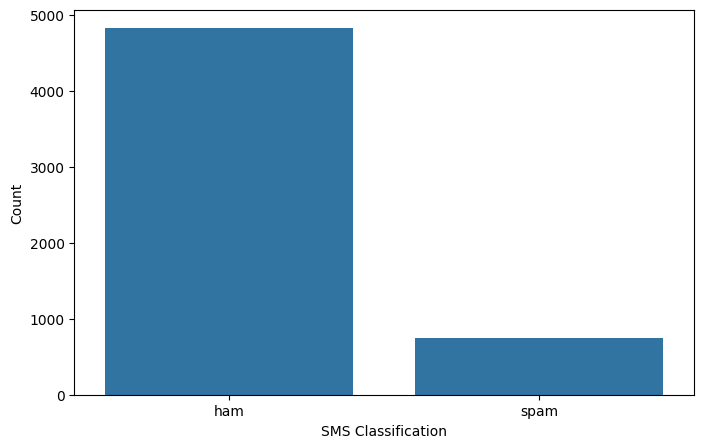

In [50]:
plt.figure(figsize=(8,5))
sns.countplot(x='spamORham', data=sms)
plt.xlabel('SMS Classification')
plt.ylabel('Count')
plt.show()

In [52]:
corpus = []
ps = PorterStemmer()

for i in range(0,sms.shape[0]):
    Message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms.Message[i]) #Cleaning special character from the message
    Message = Message.lower() #Converting the entire message into lower case
    words = Message.split() # Tokenizing the review by words
    words = [word for word in words if word not in set(stopwords.words('english'))] #Removing the stop words
    words = [ps.stem(word) for word in words] #Stemming the words
    Message = ' '.join(words) #Joining the stemmed words
    corpus.append(Message) #Building a corpus of messages

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [54]:
y = pd.get_dummies(sms['spamORham'])
y = y.iloc[:, 1].values

In [55]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [57]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.0,1.1,0.1):
    temp_classifier = MultinomialNB(alpha=i)
    temp_classifier.fit(X_train, y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)
    print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
    if score>best_accuracy:
        best_accuracy = score
        alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Accuracy score for alpha=0.0 is: 97.58%
Accuracy score for alpha=0.1 is: 98.39%
Accuracy score for alpha=0.2 is: 98.48%
Accuracy score for alpha=0.3 is: 98.57%
Accuracy score for alpha=0.4 is: 98.57%
Accuracy score for alpha=0.5 is: 98.48%
Accuracy score for alpha=0.6 is: 98.57%
Accuracy score for alpha=0.7 is: 98.57%
Accuracy score for alpha=0.8 is: 98.65%
Accuracy score for alpha=0.9 is: 98.65%
Accuracy score for alpha=1.0 is: 98.65%
--------------------------------------------
The best accuracy is 98.65% with alpha value as 0.8


In [58]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [59]:
y_pred = classifier.predict(X_test)

In [60]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [61]:
acc_s = accuracy_score(y_test, y_pred)*100

In [62]:
print("Accuracy Score {} %".format(round(acc_s,2)))

Accuracy Score 98.39 %


In [63]:
def predict_spam(sample_message):
    sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
    sample_message = sample_message.lower()
    sample_message_words = sample_message.split()
    sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_message = [ps.stem(word) for word in sample_message_words]
    final_message = ' '.join(final_message)
    temp = cv.transform([final_message]).toarray()
    return classifier.predict(temp)

In [64]:
result = ['Wait a minute, this is a SPAM!','Ohhh, this is a normal message.']

In [65]:
msg = "Hi! You are pre-qulified for Premium SBI Credit Card. Also get Rs.500 worth Amazon Gift Card*, 10X Rewards Point* & more. Click "

if predict_spam(msg):
    print(result[0])
else:
    print(result[1])

Wait a minute, this is a SPAM!


In [66]:
msg = "[Update] Congratulations Nile Yogesh, You account is activated for investment in Stocks. Click to invest now: "

if predict_spam(msg):
    print(result[0])
else:
    print(result[1])

Wait a minute, this is a SPAM!


In [67]:
msg = "Your Stock broker FALANA BROKING LIMITED reported your fund balance Rs.1500.5 & securities balance 0.0 as on end of MAY-20 . Balances do not cover your bank, DP & PMS balance with broking entity. Check details at YOGESHNILE.WORK4U@GMAIL.COM. If email Id not correct, kindly update with your broker."

if predict_spam(msg):
    print(result[0])
else:
    print(result[1])

Ohhh, this is a normal message.


In [68]:
msg = "U can call me now..."
if predict_spam(msg):
    print(result[0])
else:
    print(result[1])

Ohhh, this is a normal message.


In [69]:
msg = "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune"
if predict_spam(msg):
    print(result[0])
else:
    print(result[1])

Ohhh, this is a normal message.


In [70]:
msg = "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
if predict_spam(msg):
    print(result[0])
else:
    print(result[1])

Wait a minute, this is a SPAM!
